In [1]:
!git clone https://github.com/Chawalit-janinta/dataset_flowers.git

Cloning into 'dataset_flowers'...
remote: Enumerating objects: 4329, done.
remote: Total 4329 (delta 0), reused 0 (delta 0), pack-reused 4329
Receiving objects: 100% (4329/4329), 224.05 MiB | 15.57 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (8582/8582), done.


In [2]:
!pip install opencv-contrib-python 

In [3]:
import os
print(os.listdir('dataset_flowers/flowers'))

flower = ["daisy","rose","sunflower","tulip"]

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [4]:
import cv2     
import os                                       
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical            
from sklearn.preprocessing import LabelEncoder    

folders = ['dataset_flowers/flowers/daisy','dataset_flowers/flowers/sunflower','dataset_flowers/flowers/rose','dataset_flowers/flowers/tulip']

images = []                                                
labels = []                                                 

def load_images_from_folder(folder):           
    for filename in os.listdir(folder):               
        img = cv2.imread(os.path.join(folder, filename))        
        img = cv2.resize(img, (150, 150))        
        #img =image.img_to_array(img)         
        images.append(img)                         
        label = folder.split(os.path.sep)[-1]     
        labels.append(label)                       

def convert_images(images):
    X = np.array(images)          
    # X = X.reshape(X.shape[0],100*100*3)            ## reshape 3D to 1D vector 
    return X

def convert_labels(labels):
    enc = LabelEncoder()                        
    P = enc.fit_transform(labels)              
    Y = to_categorical(P)                        
    return Y

for folder in folders:                                                            
    print('Reading images from path: ' + folder)
    load_images_from_folder(folder)           
X = convert_images(images)
Y = convert_labels(labels)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

Using TensorFlow backend.


Reading images from path: dataset_flowers/flowers/daisy
Reading images from path: dataset_flowers/flowers/sunflower
Reading images from path: dataset_flowers/flowers/rose
Reading images from path: dataset_flowers/flowers/tulip
(2616, 150, 150, 3)
(2616, 4)
(655, 150, 150, 3)
(655, 4)


In [5]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
IMG_SIZE=150
x=[]
z=[]

def assign_label(img,flower_type):
    return flower_type
    
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        x.append(np.array(img))
        z.append(str(label))

make_train_data('Daisy','dataset_flowers/flowers/daisy')
print(len(X))

make_train_data('Sunflower','dataset_flowers/flowers/sunflower')
print(len(X))

make_train_data('Tulip','dataset_flowers/flowers/tulip')
print(len(X))

make_train_data('Rose','dataset_flowers/flowers/rose')
print(len(X))



  6%|▌         | 41/734 [00:00<00:01, 405.29it/s]

3271


  4%|▍         | 44/984 [00:00<00:02, 436.22it/s]

3271


  7%|▋         | 57/784 [00:00<00:01, 558.53it/s]

3271


100%|██████████| 784/784 [00:01<00:00, 505.90it/s]

3271


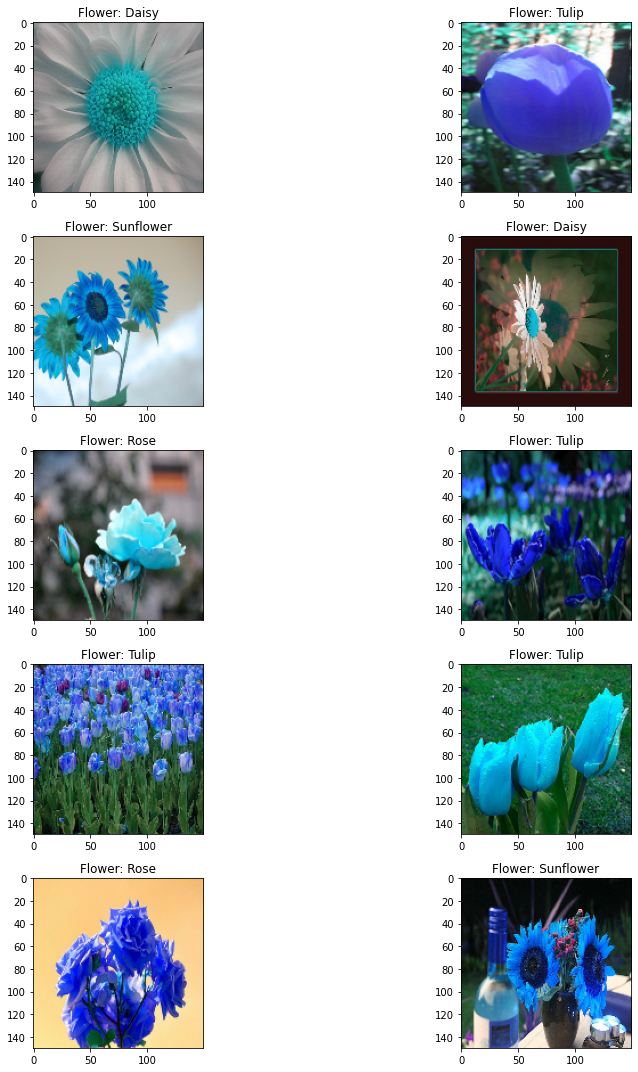

In [6]:
import random as rn
import matplotlib.pyplot as plt

fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(z))
        ax[i,j].imshow(x[l])
        ax[i,j].set_title('Flower: '+z[l])
        
plt.tight_layout()







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 146, 146, 6)       456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 69, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 16)        6416      
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)        

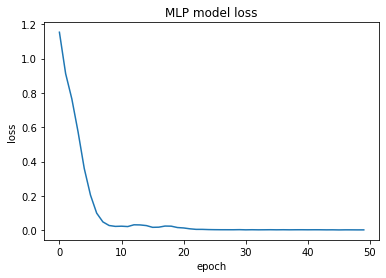

In [7]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt

cnn = Sequential()
cnn.add(Conv2D(6, (5, 5), activation='relu', input_shape=(150, 150, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
cnn.add(Conv2D(16, (5, 5)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(16, (5, 5)))

cnn.add(Flatten())   
cnn.add(Dense(200, activation='relu'))
cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(4, activation='softmax'))


cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')

cnn.summary()


history = cnn.fit(X_train, Y_train, epochs=50, verbose=2,batch_size = 128)  # epochs จำนวนรอบ Train

plt.plot(history.history['loss'])
plt.title('MLP model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


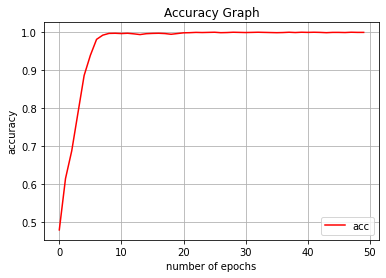

In [8]:
plt.plot(history.history["acc"],color="r",label="acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

In [9]:
scores =cnn.evaluate(X_test, Y_test) # let's look at the accuracy on the test set
print("Accuracy test: %.2f%%" % (scores[1]*100))

655/655 [==============================] - 0s 429us/step
Accuracy test: 57.71%


Predict :  rose
Actual :  tulip


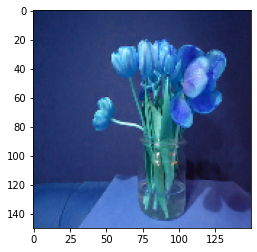

In [10]:
index = rn.randint(0,400)

plt.imshow(X_test[index])                   

Y = cnn.predict([[X_test[index]]])            
i = 0 
m = 0
j = 0

if(Y[0][0]>Y[0][1]):
  j = 0
else:
  j = 1

print('Predict : ', flower[j])

for i in range(4):
  if(Y_test[index][i]==1):
    print('Actual : ',flower[i])
plt.show()

In [11]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn import datasets, metrics 



YG = []
answer = []

for i in range(40):
    Y = cnn.predict([[X_test[i]]])           
    m = 0
    j = 0
    for k in range(4):
      if(m < Y[0][k]):
        m = Y[0][k]
        j = k
  
    YG.append(j)
for i in range(40):
  j=0
  for k in range(4):
    if(Y_test[i][k]==1):
      j = k
      answer.append(j)
Y_answer = np.array(answer)
Y_G = np.array(YG)

print(metrics.classification_report(Y_answer,Y_G, target_names=flower))


              precision    recall  f1-score   support

       daisy       0.91      0.83      0.87        12
        rose       0.36      0.50      0.42         8
   sunflower       0.40      0.67      0.50         6
       tulip       0.38      0.21      0.27        14

    accuracy                           0.53        40
   macro avg       0.51      0.55      0.52        40
weighted avg       0.54      0.53      0.52        40

